In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
wal = pd.read_csv('Walmart.csv')

In [4]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
for col in wal.columns:
    pct_missing = np.mean(wal[col].isnull())
    #print('{} - {}%'.format(col,pct_missing))
    print(col,pct_missing)

Store 0.0
Date 0.0
Weekly_Sales 0.0
Holiday_Flag 0.0
Temperature 0.0
Fuel_Price 0.0
CPI 0.0
Unemployment 0.0


In [7]:
wal['Date'] = wal['Date'].apply(pd.to_datetime)

In [9]:
wal['Date']

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [11]:
wal['Holiday_Flag'] = wal['Holiday_Flag'].astype('bool')

In [12]:
wal['Holiday_Flag']

0       False
1        True
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Name: Holiday_Flag, Length: 6435, dtype: bool

In [13]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   bool          
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 358.3 KB


In [17]:
wal.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,False,5.73,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,True,3.62,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,False,4.41,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,False,8.13,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,False,8.06,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,False,14.33,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,False,12.55,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,False,10.81,2.732,211.018042,8.106
8,1,2010-02-04,1594968.28,False,16.82,2.719,210.820450,7.808
9,1,2010-09-04,1545418.53,False,18.81,2.770,210.622857,7.808


In [15]:
#Changeing Temperature from F to C
wal['Temperature'] = wal['Temperature'].apply(lambda x: round((x-32)*.5556,2))

In [16]:
wal['Temperature']

0        5.73
1        3.62
2        4.41
3        8.13
4        8.06
        ...  
6430    18.27
6431    18.27
6432    12.48
6433    13.60
6434    14.92
Name: Temperature, Length: 6435, dtype: float64

In [18]:
#Check how many store this file contains
wal['Store'].nunique()

45

In [19]:
#Select the row with biggest weekly sales 
wal[wal['Weekly_Sales'] == wal['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,False,-0.78,3.141,182.54459,8.724


In [20]:
#Extract year to a new column for analysis
wal['Year'] = pd.DatetimeIndex(wal['Date']).year  

In [21]:
#Calculating average weekly sales by year
wal_avg = wal[wal.columns[2:9]].groupby('Year').mean()
round(wal_avg['Weekly_Sales'],2)

Year
2010    1059669.50
2011    1046239.32
2012    1033660.39
Name: Weekly_Sales, dtype: float64

/Volumes/ExtendHFS/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


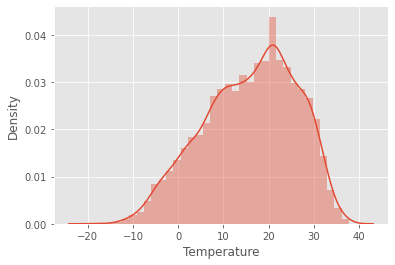

In [22]:
sns.distplot(wal['Temperature'])
plt.show()

In [23]:
mx = round(wal[wal.columns[2:8]].corr(),3)
mx

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000,0.037,-0.064,0.009,-0.073,-0.106
Holiday_Flag,0.037,1.000,-0.155,-0.078,-0.002,0.011
Temperature,-0.064,-0.155,1.000,0.145,0.177,0.101
Fuel_Price,0.009,-0.078,0.145,1.000,-0.171,-0.035
CPI,-0.073,-0.002,0.177,-0.171,1.000,-0.302
Unemployment,-0.106,0.011,0.101,-0.035,-0.302,1.000


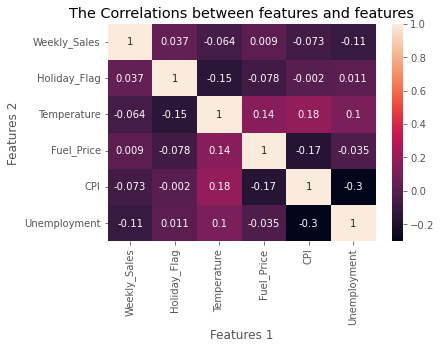

In [24]:
sns.heatmap(mx,annot=True)
plt.title('The Correlations between features and features')
plt.xlabel('Features 1')
plt.ylabel('Features 2')
plt.show()

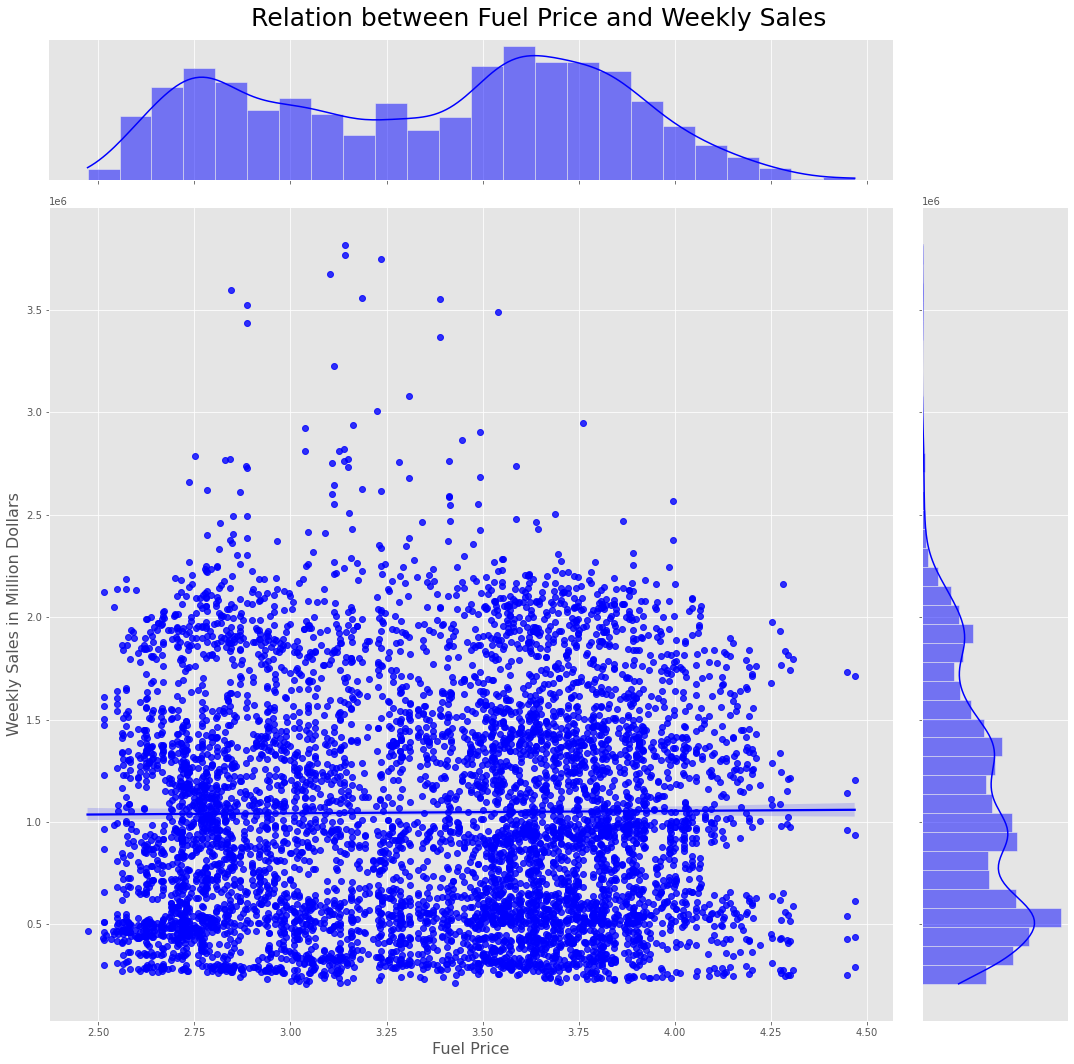

In [25]:
ax = sns.jointplot(x='Fuel_Price',y='Weekly_Sales',data=wal, kind='reg',
                  height = 15, color='blue')
ax.fig.suptitle('Relation between Fuel Price and Weekly Sales',size = 25)
ax.fig.subplots_adjust(top=0.95)
ax.set_axis_labels('Fuel Price', 'Weekly Sales in Million Dollars', fontsize=16)
plt.show()
# It seems like higher fuel price will not influence weekly sales

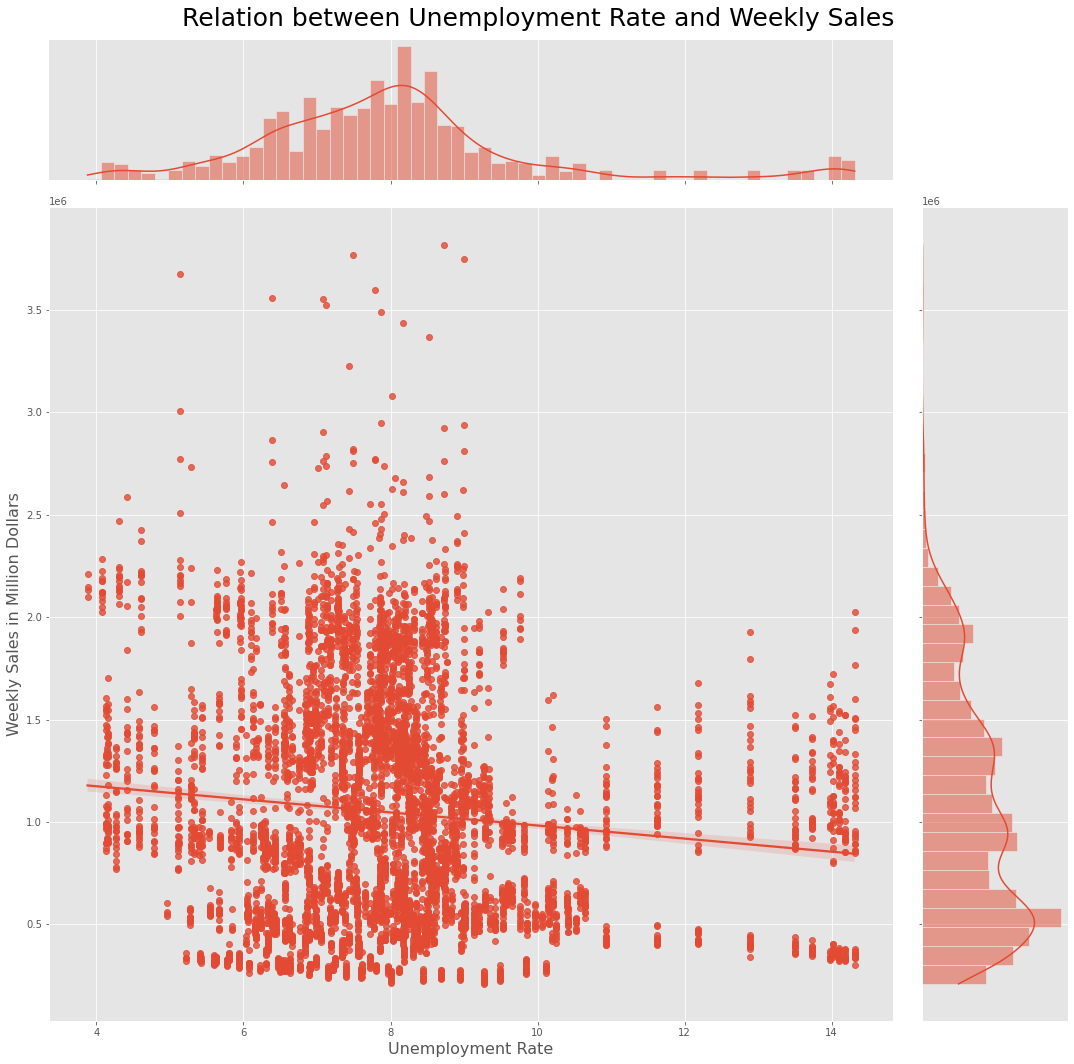

In [26]:
ax1 = sns.jointplot(x='Unemployment',y='Weekly_Sales',data=wal, kind='reg',
                  height = 15)
ax1.fig.suptitle('Relation between Unemployment Rate and Weekly Sales',size = 25)
ax1.fig.subplots_adjust(top=0.95)
ax1.set_axis_labels('Unemployment Rate', 'Weekly Sales in Million Dollars', fontsize=16)
plt.show()
# It seems like the unemployment rate goes high will cause 
# the weekly sales goes down.

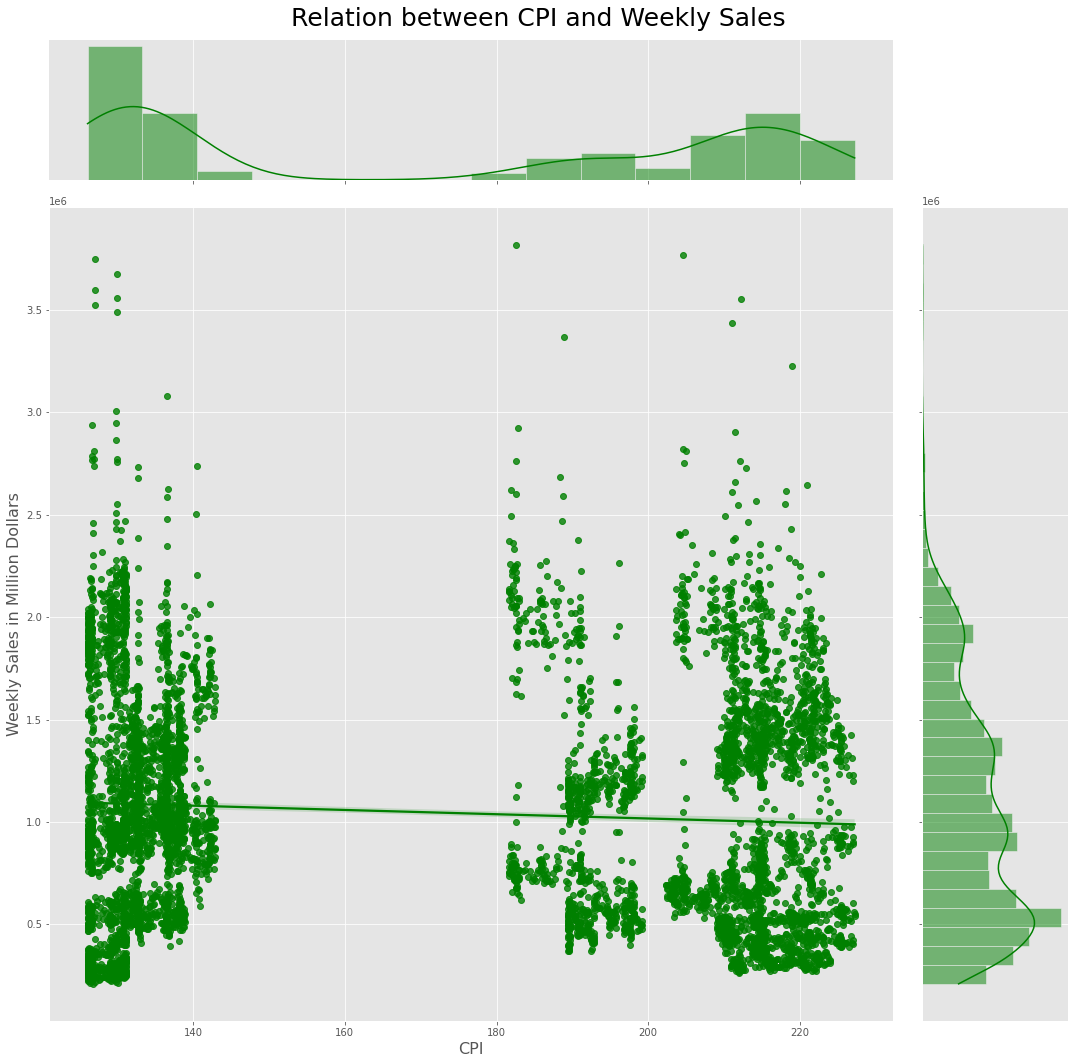

In [27]:
ax2 = sns.jointplot(x='CPI',y='Weekly_Sales',data=wal, kind='reg',
                  height = 15, color='green')
ax2.fig.suptitle('Relation between CPI and Weekly Sales',size = 25)
ax2.fig.subplots_adjust(top=0.95)
ax2.set_axis_labels('CPI', 'Weekly Sales in Million Dollars', fontsize=16)
plt.show()
#The Data Source may not accurate since it is very wierd
#That the CPI distribution is not continuous

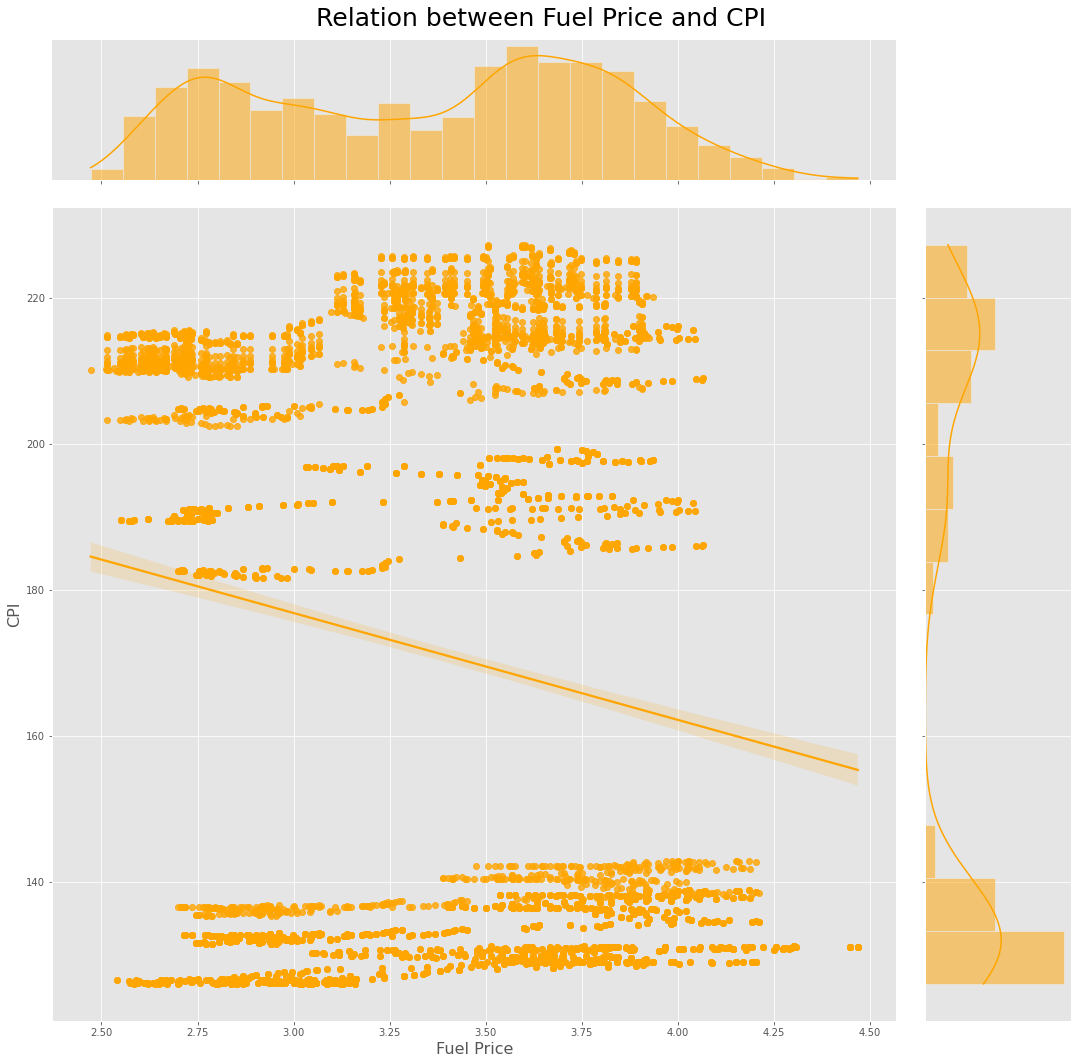

In [29]:
ax3 = sns.jointplot(x='Fuel_Price',y='CPI',data=wal, kind='reg',
                  height = 15, color='orange')
ax3.fig.suptitle('Relation between Fuel Price and CPI',size = 25)
ax3.fig.subplots_adjust(top=0.95)
ax3.set_axis_labels('Fuel Price', 'CPI', fontsize=16)
plt.show()
#The Data Source may not accurate since it is very wierd
#That the CPI distribution is not continuous

/Volumes/ExtendHFS/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


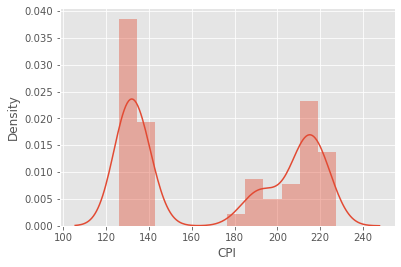

In [30]:
sns.distplot(wal['CPI'])
plt.show()
#The Data Source may not accurate since it is very wierd
#That the CPI distribution is not continuous, missing some index near 140 - 180 range